### Opening and analysing single day of a feature

In [ ]:
import xarray as xr

# Open the NetCDF file
file_path = './features/profundidade_nuvens/2021/PN_2021_12_17.nc'
ds = xr.open_dataset(file_path)

# Display the contents of the dataset
print(ds)

# Display the contents of a single variable
#print(ds['CMI_2021_12_17_00_00'].values)

Text(0, 0.5, 'Latitude')

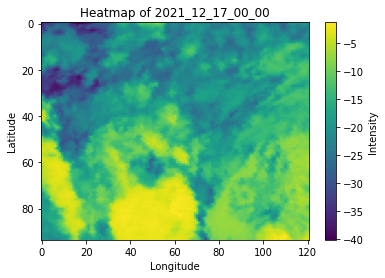

In [79]:
import matplotlib.pyplot as plt

# Plot data from CMI_2021_12_17_00_00
data_values = ds['CMI_2021_12_17_00_00'].values
plt.imshow(data_values, cmap='viridis', aspect='auto')  # You can choose a different colormap, like 'inferno' or 'plasma'
plt.colorbar(label='Intensity')  # Add color bar to show the scale of values
plt.title('Heatmap of 2021_12_17_00_00')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Moving data from old dataset to a new one with better format

In [68]:
import xarray as xr
import numpy as np
import re

# Open the NetCDF file
file_path = './features/profundidade_nuvens/2021/PN_2021_12_17.nc'
ds = xr.open_dataset(file_path)

# Create the new empty dataset with the correct dimensions for 'lat' and 'lon'
new_ds = xr.Dataset(
    {
        "data": (("time", "lat", "lon"), np.empty((0, 94, 121))),
    },
    coords={
        "lat": np.arange(94),  # Latitude indices from 0 to 93
        "lon": np.arange(121),  # Longitude indices from 0 to 120
    },
    attrs={
        "description": "Empty NetCDF file for data insertion",
    },
)

# Initialize an empty list to store timestamps
timestamps = []

# Iterate over each variable in the original dataset
for var_name in ds.variables:
    # Use regular expression to find variable names that match the pattern 'CMI_YYYY_MM_DD_HH_MM'
    match = re.search(r'CMI_(\d{4}_\d{2}_\d{2}_\d{2}_\d{2})', var_name)
    if match:
        # Extract the timestamp string from the matched pattern
        timestamp_str = match.group(1)
        
        # Convert the timestamp string to a numpy datetime64 object
        timestamp = np.datetime64(
            f"{timestamp_str[:4]}-{timestamp_str[5:7]}-{timestamp_str[8:10]}T{timestamp_str[11:13]}:{timestamp_str[14:]}"
        )
        timestamps.append(timestamp)
        
        # Get the data for this timestamp (assuming it's a 2D array of lat x lon)
        data = ds[var_name].values  # Data should be 2D (lat x lon)

        # Append the data to the new dataset, associating it with the corresponding timestamp
        new_ds = new_ds.assign(
            data=(("time", "lat", "lon"), np.concatenate([new_ds.data.values, [data]], axis=0))
        )

# Now assign the 'time' coordinate after all data has been added
new_ds.coords["time"] = ("time", timestamps)

# Print the final dataset for inspection
print(new_ds)


<xarray.Dataset>
Dimensions:  (time: 144, lat: 94, lon: 121)
Coordinates:
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 84 85 86 87 88 89 90 91 92 93
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 113 114 115 116 117 118 119 120
  * time     (time) datetime64[ns] 2021-12-17T01:30:00 ... 2021-12-17T22:50:00
Data variables:
    data     (time, lat, lon) float64 -23.31 -23.89 -23.89 ... -7.038 -7.038
Attributes:
    description:  Empty NetCDF file for data insertion


#### Making sure the data is intact

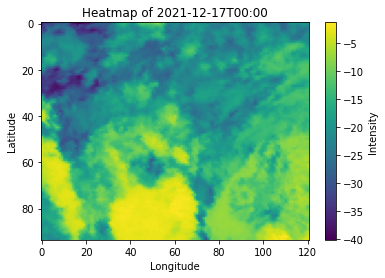

In [80]:
target_timestamp = np.datetime64("2021-12-17T00:00")
data = new_ds.sel(time=target_timestamp).data

# Plot the data for the target timestamp
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar(label='Intensity')
plt.title(f'Heatmap of {target_timestamp}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()